# Création figure pour expliquer objectif stage

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
from skimage.measure import find_contours
import os
import calendar

In [107]:
ds_snc = xr.open_dataset("~/private-storage/interp_models_SW/MRI-ESM2-0_SW_reprojete.nc")
ds_snc

<xarray.Dataset> Size: 87MB
Dimensions:  (GSAT: 23, month: 12, lat: 180, lon: 360, Level: 5)
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * Level    (Level) float32 20B 10.0 25.0 50.0 75.0 90.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sncbin   (GSAT, month, lat, lon) float32 72MB ...
    Limit    (Level, month, lat, lon) float32 16MB ...
Attributes:
    regrid_method:  nearest_s2d

In [108]:
ds_sftlf = xr.open_dataset("~/private-storage/interp_sftlf_bis/MRI-ESM2-0_sftlf_reprojete.nc")
ds_sftlf

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
    type     |S4 4B ...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftlf    (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  nearest_s2d

In [109]:
sftlf = ds_sftlf['sftlf']

In [110]:
def extraction_variable(ds_snc, variable="sncbin", lat_min=20):
    snc = ds_snc[variable]

    if lat_min is not None:
        snc = snc.sel(lat=snc.lat>=lat_min)

    snc = snc.where(snc< 1e19, float("nan"))

    max_val = snc.max().item()
    if max_val > 1.5:
        print(f"La variable '{variable}' est en %. Conversion en fraction.")
        snc = snc/100

    if sftlf is not None:
        snc = snc.where(sftlf>0)

    snc = snc.clip(0, 1)

    return snc

In [111]:
snc = extraction_variable(ds_snc)

La variable 'sncbin' est en %. Conversion en fraction.


In [112]:
snc

<xarray.DataArray 'sncbin' (GSAT: 23, month: 12, lat: 70, lon: 360)> Size: 28MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    type     |S4 4B ...

In [113]:
snc_gsat0 = snc.sel(GSAT=0.0)
snc_gsat025 = snc.sel(GSAT=0.25)
snc_gsat05 = snc.sel(GSAT=0.5)
snc_gsat075 = snc.sel(GSAT=0.75)
snc_gsat1 = snc.sel(GSAT=1)
snc_gsat125 = snc.sel(GSAT=1.25)
snc_gsat15 = snc.sel(GSAT=1.5)
snc_gsat175 = snc.sel(GSAT=1.75)
snc_gsat2 = snc.sel(GSAT=2)
snc_gsat225 = snc.sel(GSAT=2.25)
snc_gsat275 = snc.sel(GSAT=2.75)
snc_gsat3 = snc.sel(GSAT=3)
snc_gsat325 = snc.sel(GSAT=3.25)
snc_gsat35 = snc.sel(GSAT=3.5)
snc_gsat375 = snc.sel(GSAT=3.75)
snc_gsat4 = snc.sel(GSAT=4)
snc_gsat425 = snc.sel(GSAT=4.25)
snc_gsat45 = snc.sel(GSAT=4.5)
snc_gsat475 = snc.sel(GSAT=4.75)
snc_gsat5 = snc.sel(GSAT=5)

In [114]:
snc

<xarray.DataArray 'sncbin' (GSAT: 23, month: 12, lat: 70, lon: 360)> Size: 28MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * month    (month) float32 48B 1.0 2.0 3.0 4.0 5.0 ... 8.0 9.0 10.0 11.0 12.0
  * GSAT     (GSAT) float32 92B -0.5 -0.25 0.0 0.25 0.5 ... 4.25 4.5 4.75 5.0
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    type     |S4 4B ...

In [115]:
import pandas as pd

gsat_values = [0.0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.75,
               3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]

df_list = []

for gsat in gsat_values:
    # Sélectionne les données pour GSAT donné et le mois de mai
    da = snc.sel(GSAT=gsat, month=5)
    
    # Convertit en DataFrame
    df = da.to_dataframe().reset_index()
    df['GSAT'] = gsat
    df_list.append(df)

# Fusionne tous les DataFrames
df_all = pd.concat(df_list, ignore_index=True)

In [116]:
df_all

,lat,lon,month,GSAT,type,sncbin
0,20.5,-179.5,5.0,0.0,b'land',NaN
1,20.5,-178.5,5.0,0.0,b'land',NaN
2,20.5,-177.5,5.0,0.0,b'land',NaN
3,20.5,-176.5,5.0,0.0,b'land',NaN
4,20.5,-175.5,5.0,0.0,b'land',NaN
...,...,...,...,...,...,...
503995,89.5,175.5,5.0,5.0,b'land',NaN
503996,89.5,176.5,5.0,5.0,b'land',NaN
503997,89.5,177.5,5.0,5.0,b'land',NaN
503998,89.5,178.5,5.0,5.0,b'land',NaN


In [117]:
df_may

,lat,lon,month,GSAT,type,sncbin
0,20.5,-179.5,5.0,0.0,b'land',NaN
1,20.5,-178.5,5.0,0.0,b'land',NaN
2,20.5,-177.5,5.0,0.0,b'land',NaN
3,20.5,-176.5,5.0,0.0,b'land',NaN
4,20.5,-175.5,5.0,0.0,b'land',NaN
...,...,...,...,...,...,...
503995,89.5,175.5,5.0,5.0,b'land',NaN
503996,89.5,176.5,5.0,5.0,b'land',NaN
503997,89.5,177.5,5.0,5.0,b'land',NaN
503998,89.5,178.5,5.0,5.0,b'land',NaN


In [118]:
df_may = df_all[df_all['month'] == 5]

# On somme les sncbin par (lat, lon) sur toutes les valeurs de GSAT
df_sum = df_may.groupby(['lat', 'lon'])['sncbin'].sum().reset_index()

In [119]:
df_weighted_sum = (
    df.groupby(['lat', 'lon'], as_index=False)['sncbin']
    .sum()
)

# Multiplier par 0.25 (poids par bin GSAT)
df_weighted_sum['sncbin'] = df_weighted_sum['sncbin'] * 0.25

In [120]:
df_weighted_sum

,lat,lon,sncbin
0,20.5,-179.5,0.0
1,20.5,-178.5,0.0
2,20.5,-177.5,0.0
3,20.5,-176.5,0.0
4,20.5,-175.5,0.0
...,...,...,...
25195,89.5,175.5,0.0
25196,89.5,176.5,0.0
25197,89.5,177.5,0.0
25198,89.5,178.5,0.0


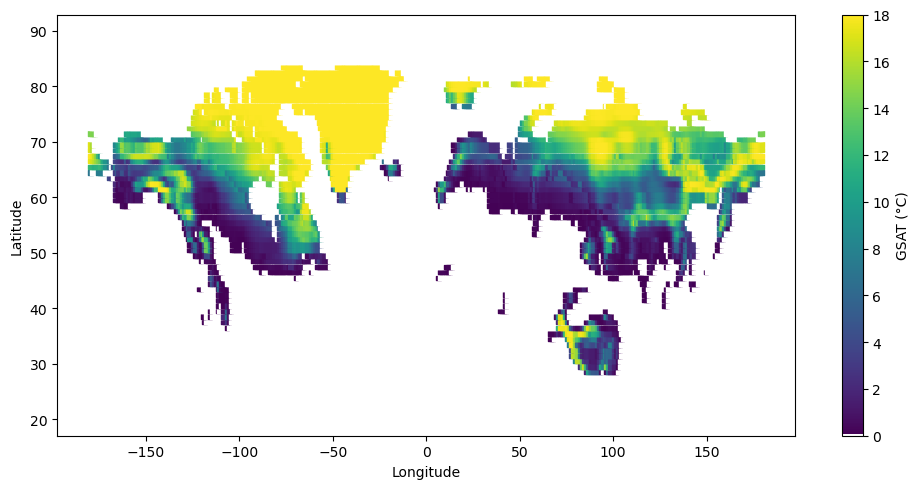

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Filtrer les données si besoin (optionnel)
df_filtered = df_sum.copy()

# Créer une copie de la colormap 'viridis' et modifier la couleur pour la valeur minimale (0)
cmap = plt.cm.viridis
# On crée une nouvelle colormap avec le premier couleur modifiée en blanc
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1, 1, 1, 1])  # RGBA blanc
new_cmap = mcolors.ListedColormap(colors)

# Normalisation en partant de 0
norm = mcolors.Normalize(vmin=df_filtered['sncbin'].min(), vmax=df_filtered['sncbin'].max())

plt.figure(figsize=(10, 5))
sc = plt.scatter(
    df_filtered['lon'], df_filtered['lat'],
    c=df_filtered['sncbin'],
    cmap=new_cmap,
    norm=norm,
    s=10,
    marker='s'
)

plt.colorbar(sc, label="GSAT (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.title("Carte sncbin avec 0 en blanc")
#plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
import pandas as pd
import xarray as xr
import numpy as np

# S'assurer que lat/lon sont bien triés
df_sorted = df_sum.sort_values(['lat', 'lon'])

# Obtenir les valeurs uniques
lats = np.sort(df_sorted['lat'].unique())
lons = np.sort(df_sorted['lon'].unique())

# Reshape les données (sncbin) en 2D : (lat x lon)
sncbin_grid = df_sorted['sncbin'].values.reshape(len(lats), len(lons))

# Construire le DataArray
da = xr.DataArray(
    sncbin_grid,
    coords={'lat': lats, 'lon': lons},
    dims=['lat', 'lon'],
    name='sncbin'
)

In [123]:
da

<xarray.DataArray 'sncbin' (lat: 70, lon: 360)> Size: 101kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [124]:
# Enlever les NaN de sncbin uniquement pour le calcul
df_valid = df_all.dropna(subset=['sncbin'])

# Somme et pondération
df_sum = (
    df_valid.groupby(['lat', 'lon'], as_index=False)['sncbin']
    .sum()
)
df_sum['sncbin'] = df_sum['sncbin'] * 0.25


In [125]:
df_sum

,lat,lon,sncbin
0,20.5,-105.5,0.0
1,20.5,-104.5,0.0
2,20.5,-103.5,0.0
3,20.5,-102.5,0.0
4,20.5,-101.5,0.0
...,...,...,...
12354,83.5,-28.5,4.5
12355,83.5,-27.5,4.5
12356,83.5,-26.5,4.5
12357,83.5,-25.5,4.5


In [126]:
# Fusion pour remettre toutes les lat/lon originales avec sncbin = 0 si rien
df_full = df_all[['lat', 'lon']].drop_duplicates().merge(
    df_sum, on=['lat', 'lon'], how='left'
)

# Remplir les absences par 0 (aucun modèle prédit perte à ce point)
df_full['sncbin'] = df_full['sncbin'].fillna(0)

In [127]:
# Sort to ensure reshaping works
df_full = df_full.sort_values(['lat', 'lon'])

# Lats/lons
lats = np.sort(df_full['lat'].unique())
lons = np.sort(df_full['lon'].unique())

# Grille sncbin
grid = df_full['sncbin'].values.reshape(len(lats), len(lons))

# xarray
import xarray as xr
da = xr.DataArray(
    grid,
    coords={'lat': lats, 'lon': lons},
    dims=['lat', 'lon'],
    name='sncbin'
)

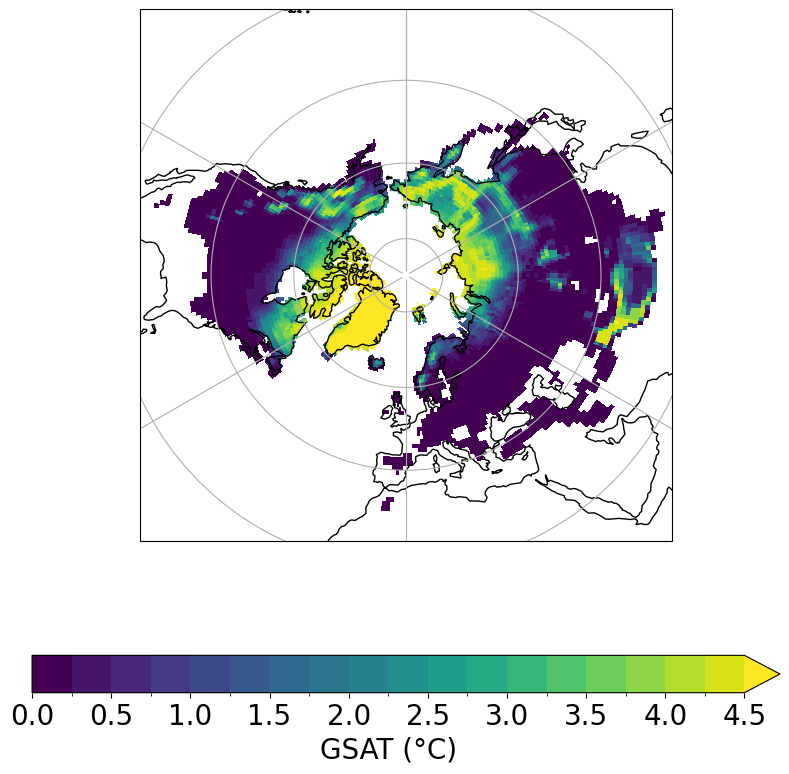

In [128]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs

# Masquer les 0 si tu veux qu’ils apparaissent en blanc
da_masked = da.where(da != 0)

# Colormap avec les 0 (ou NaN) en blanc
cmap = mpl.cm.viridis.copy()
cmap.set_bad('white')

# Intervalles de 0 à 5 par pas de 0.25
bounds = np.arange(0, 4.75, 0.25)
norm = mpl.colors.BoundaryNorm(bounds, ncolors=cmap.N, extend='max')

# Figure
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())

# pcolormesh avec norm
mesh = ax.pcolormesh(
    da.lon, da.lat, da_masked,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    norm=norm
)

ax.coastlines()
ax.gridlines(draw_labels=False)
ax.set_extent([-180, 180, 25, 90], crs=ccrs.PlateCarree())

# ✅ Colorbar liée à mesh
cbar = plt.colorbar(
    mesh,
    orientation='horizontal',
    label='GSAT (°C)'
)
cbar.set_label('GSAT (°C)', fontsize=20)
cbar.ax.tick_params(labelsize=20)

#plt.title("Carte polaire des pertes de neige selon GSAT")
plt.tight_layout()
plt.savefig("figures/snc_MRI.png")
plt.show()

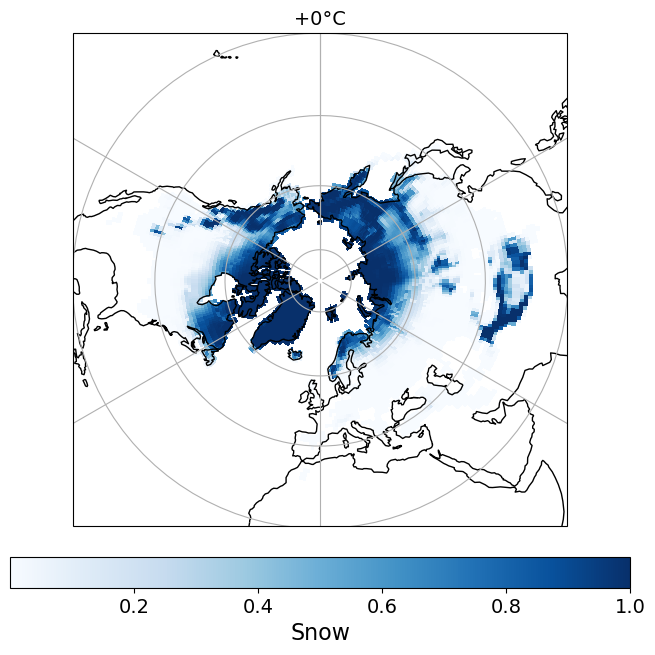

In [72]:
da = snc_gsat0.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title('+0°C', fontsize=14)
plt.savefig("figures/sncbin0bis.png")
plt.show()

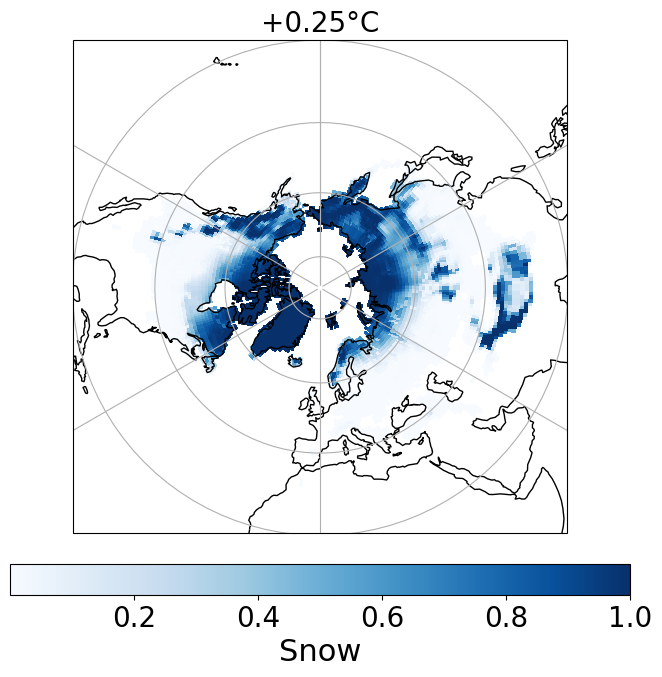

In [100]:
da = snc_gsat025.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=22)
cbar.ax.tick_params(labelsize=20)
plt.title('+0.25°C', fontsize=20)
plt.savefig("figures/snc025bis.png")
plt.show()

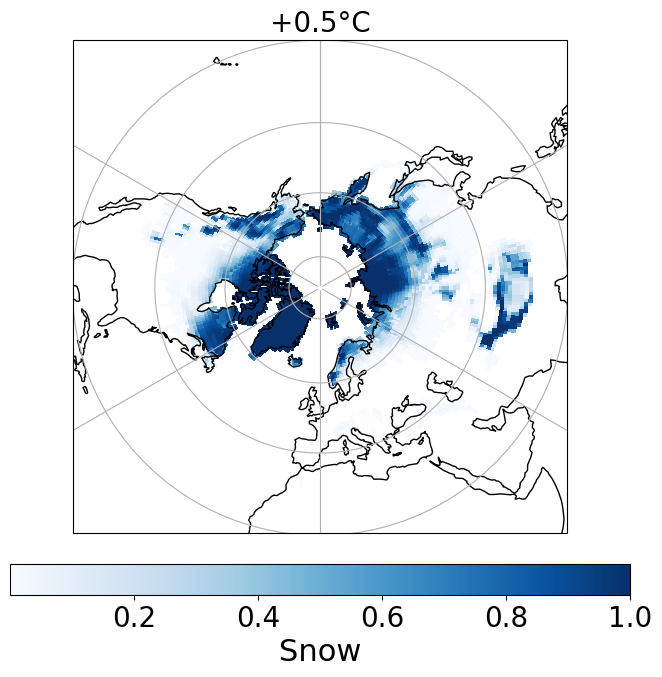

In [101]:
da = snc_gsat05.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=22)
cbar.ax.tick_params(labelsize=20)
plt.title('+0.5°C', fontsize=20)
plt.savefig("figures/snc05bis.png")
plt.show()

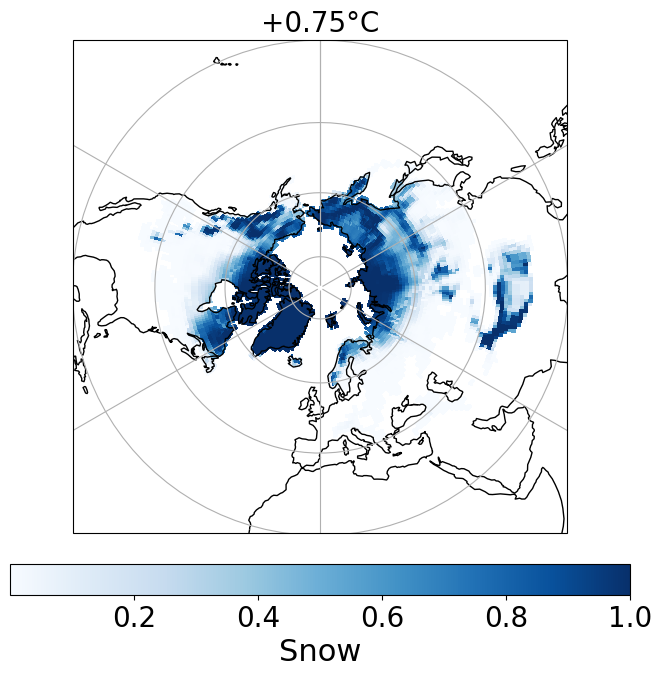

In [102]:
da = snc_gsat075.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=22)
cbar.ax.tick_params(labelsize=20)
plt.title('+0.75°C', fontsize=20)
plt.savefig("figures/snc075bis.png")
plt.show()

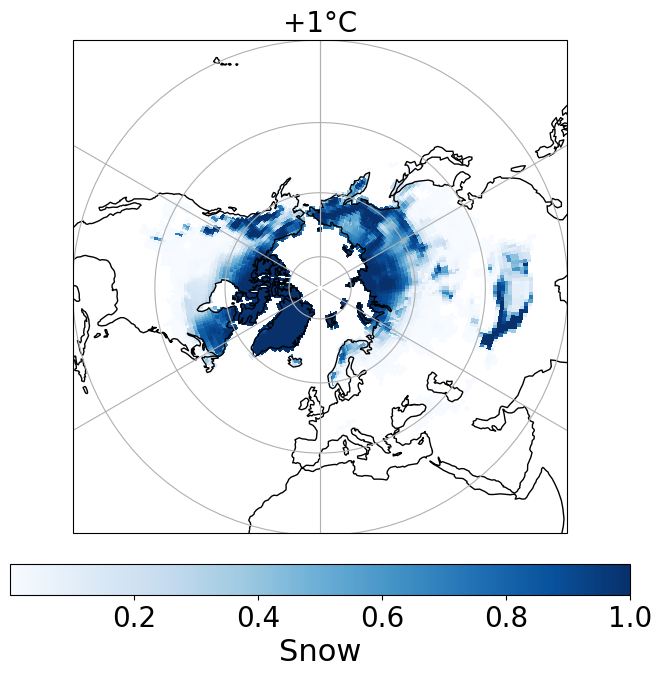

In [103]:
da = snc_gsat1.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=22)
cbar.ax.tick_params(labelsize=20)
plt.title('+1°C', fontsize=20)
plt.savefig("figures/snc1bis.png")
plt.show()

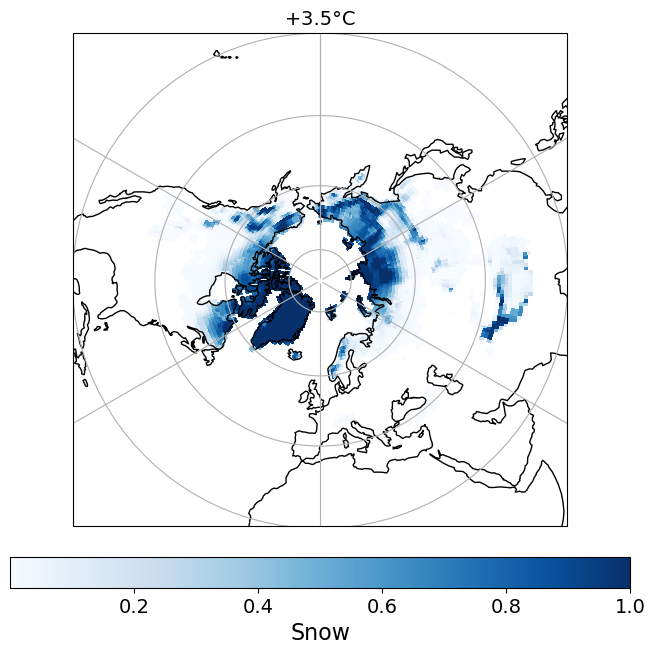

In [63]:
da = snc_gsat35.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title('+3.5°C', fontsize=14)
plt.savefig("figures/snc35bis.png")
plt.show()

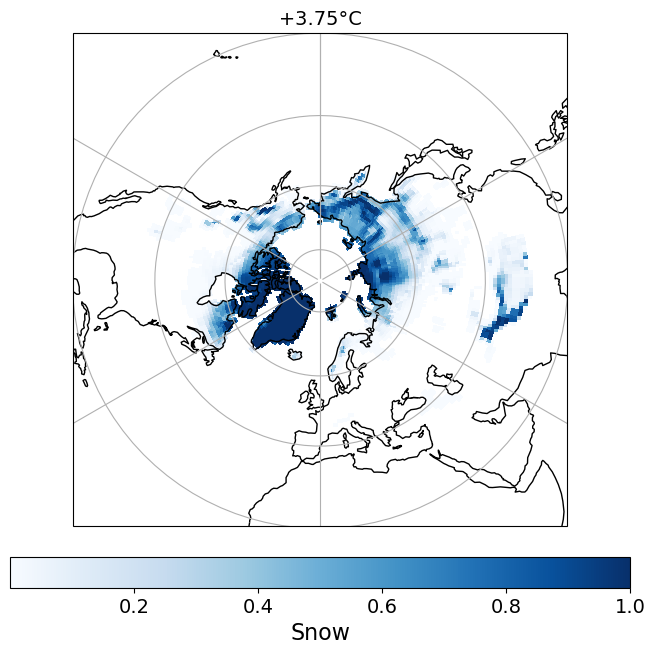

In [62]:
da = snc_gsat375.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title('+3.75°C', fontsize=14)
plt.savefig("figures/snc375bis.png")
plt.show()

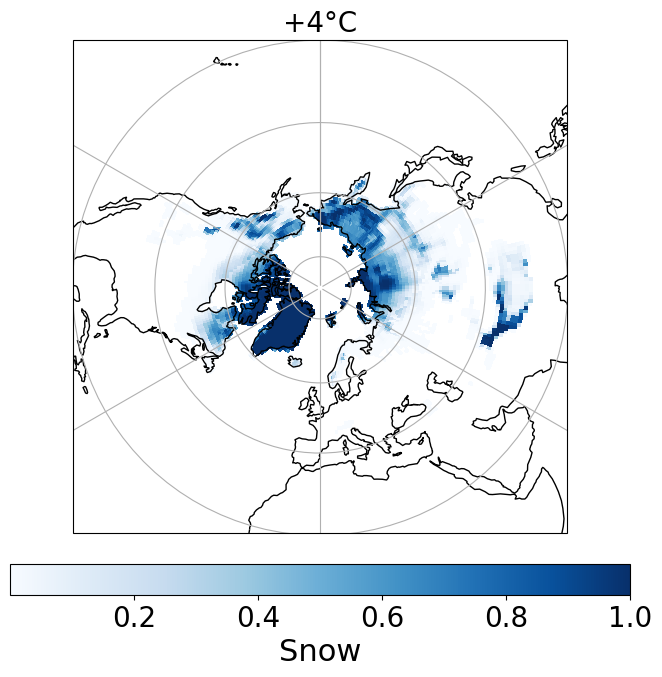

In [104]:
da = snc_gsat4.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=22)
cbar.ax.tick_params(labelsize=20)
plt.title('+4°C', fontsize=20)
plt.savefig("figures/snc4bis.png")
plt.show()

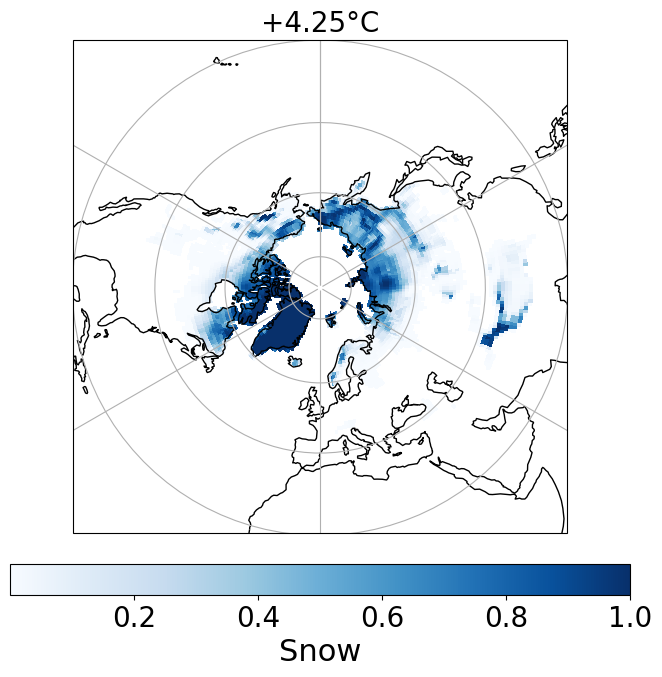

In [105]:
da = snc_gsat425.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=22)
cbar.ax.tick_params(labelsize=20)
plt.title('+4.25°C', fontsize=20)
plt.savefig("figures/snc425bis.png")
plt.show()

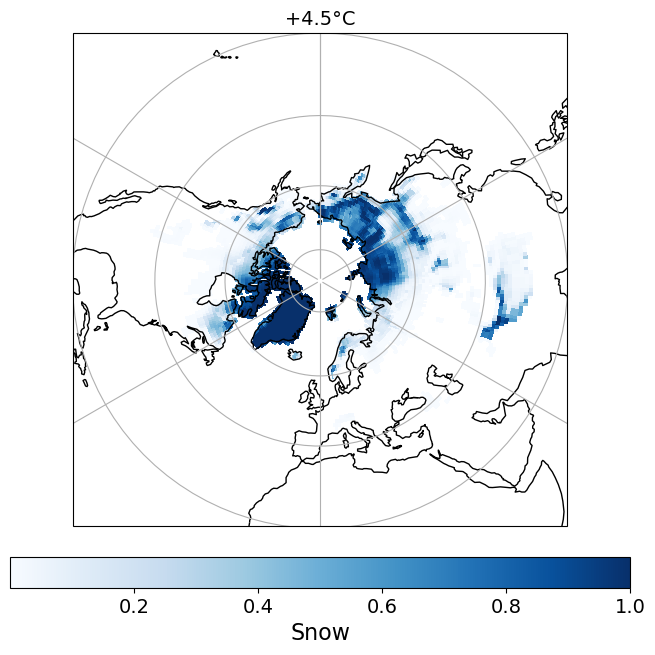

In [61]:
da = snc_gsat45.sel(month=5)
da_masked = da.where(da != 0)

#récup coordonnées
lon = da_masked.lon.values
lat = da_masked.lat.values
data = da_masked.values

#carte
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo()}, figsize=(8, 8))
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

contour = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

ax.coastlines()
ax.gridlines(draw_labels=False)
cbar = plt.colorbar(contour, orientation='horizontal', pad=0.05)
cbar.set_label('Snow', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.title('+4.5°C', fontsize=14)
plt.savefig("figures/snc45bis.png")
plt.show()